# Make plot highlighting record datasets over time

In [1]:
from mizani.formatters import comma_format
import pandas as pd
import plotnine as p

%pylab inline
%config InlineBackend.figure_formats = ['retina']

from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data = pd.read_csv('https://nxn.se/single-cell-studies/data.tsv', sep='\t', storage_options = {'User-Agent': ''})
data['Date'] = data['Date'].pipe(pd.to_datetime, format='%Y%m%d')
data['Reported cells total'] = data['Reported cells total'].str.replace(',', '').map(float)

In [3]:
df = data.query('Measurement == "RNA-seq"').reset_index(drop = True)
df = df.sort_values('Date')

df['Record breaker'] = False

record = 0
for n, row in df.iterrows():
    if row['Reported cells total'] > record:
        df.loc[n, 'Record breaker'] = True
        record = row['Reported cells total']

In [4]:
display(df.query('`Record breaker` == True'));

,Shorthand,DOI,Authors,Journal,Title,Date,bioRxiv DOI,Reported cells total,Organism,Tissue,...,Cell clustering,Pseudotime,RNA Velocity,PCA,tSNE,H5AD location,Isolation,BC --> Cell ID _OR_ BC --> Cluster ID,Number individuals,Record breaker
0,Tang et al NMeth,10.1038/NMETH.1315,"Fuchou Tang, Catalin Barbacioru, Yangzhou Wang...",Nat Methods,mRNA-Seq whole-transcriptome analysis of a sin...,2009-04-06,-,5.0,Mouse,Oocyte,...,No,No,No,No,No,NaN,Pipetting (Manual picking),NaN,NaN,True
1,Tang et al CSC,10.1016/j.stem.2010.03.015,"Fuchou Tang, Catalin Barbacioru, Siqin Bao, Ca...",Cell Stem Cell,Tracing the Derivation of Embryonic Stem Cells...,2010-05-07,-,34.0,Mouse,Embryo,...,NaN,NaN,No,Yes,NaN,NaN,NaN,NaN,NaN,True
2,Islam et al GR,10.1101/gr.110882.110,"S. Islam, U. Kjallquist, A. Moliner, P. Zajac,...",Genome Research,Characterization of the single-cell transcript...,2011-05-05,-,85.0,Mouse,Culture,...,Yes,No,NaN,Yes,No,NaN,Pipetting (Manual picking),NaN,NaN,True
6,Hashimshony et al CR,10.1016/j.celrep.2012.08.003,"Tamar Hashimshony, Florian Wagner, Noa Sher, I...",Cell Reports,CEL-Seq: Single-Cell RNA-Seq by Multiplexed Li...,2012-08-30,-,96.0,C elegans,Embryo,...,No,No,NaN,No,No,NaN,Pipetting (Manual picking),NaN,NaN,True
11,Yan et al NSMB,10.1038/nsmb.2660,"Liying Yan, Mingyu Yang, Hongshan Guo, Lu Yang...",Nat Struct Mol Biol,Single-cell RNA-Seq profiling of human preimpl...,2013-08-09,-,124.0,Human,Culture,...,Yes,No,NaN,Yes,No,NaN,NaN,NaN,NaN,True
17,Islam et al NMeth,10.1038/nmeth.2772,"Saiful Islam, Amit Zeisel, Simon Joost, Gioele...",Nat Methods,Quantitative single-cell RNA-seq with unique m...,2013-12-22,-,192.0,Mouse,Culture,...,No,No,NaN,No,No,NaN,IFC Capture,NaN,NaN,True
18,Deng et al Science,10.1126/science.1245316,"Q. Deng, D. Ramskold, B. Reinius, R. Sandberg",Science,"Single-Cell RNA-Seq Reveals Dynamic, Random Mo...",2014-01-09,-,269.0,Mouse,Embryo,...,No,No,No,Yes,No,NaN,NaN,NaN,NaN,True
19,Jaitin et al Science,10.1126/science.1247651,"D. A. Jaitin, E. Kenigsberg, H. Keren-Shaul, N...",Science,Massively Parallel Single-Cell RNA-Seq for Mar...,2014-02-14,-,4468.0,Mouse,Spleen,...,Yes,No,NaN,No,No,NaN,Sorting (FACS),NaN,NaN,True
20,Soumillon et al bioRxiv,10.1101/003236,"Magali Soumillon, Davide Cacchiarelli, Stefan ...",bioRxiv,Characterization of directed differentiation b...,2014-03-10,10.1101/003236,12832.0,Human,Culture,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
38,Fan et al Science,10.1126/science.1258367,"H. Christina Fan, Glenn K. Fu, Stephen P. A. F...",Science,Combinatorial labeling of single cells for gen...,2015-02-05,-,15000.0,Human,"Blood, Culture",...,Yes,No,NaN,Yes,No,NaN,Picowell deposition,NaN,2.0,True


In [5]:
df.columns

Index(['Shorthand', 'DOI', 'Authors', 'Journal', 'Title', 'Date',
       'bioRxiv DOI', 'Reported cells total', 'Organism', 'Tissue',
       'Technique', 'Data location', 'Panel size', 'Measurement',
       'Cell source', 'Disease', 'Contrasts', 'Developmental stage',
       'Number of reported cell types or clusters', 'Cell clustering',
       'Pseudotime', 'RNA Velocity', 'PCA', 'tSNE', 'H5AD location',
       'Isolation', 'BC --> Cell ID _OR_ BC --> Cluster ID',
       'Number individuals', 'Record breaker'],
      dtype='object')

In [6]:
df.shape

(1702, 29)

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 378 rows containing missing values.


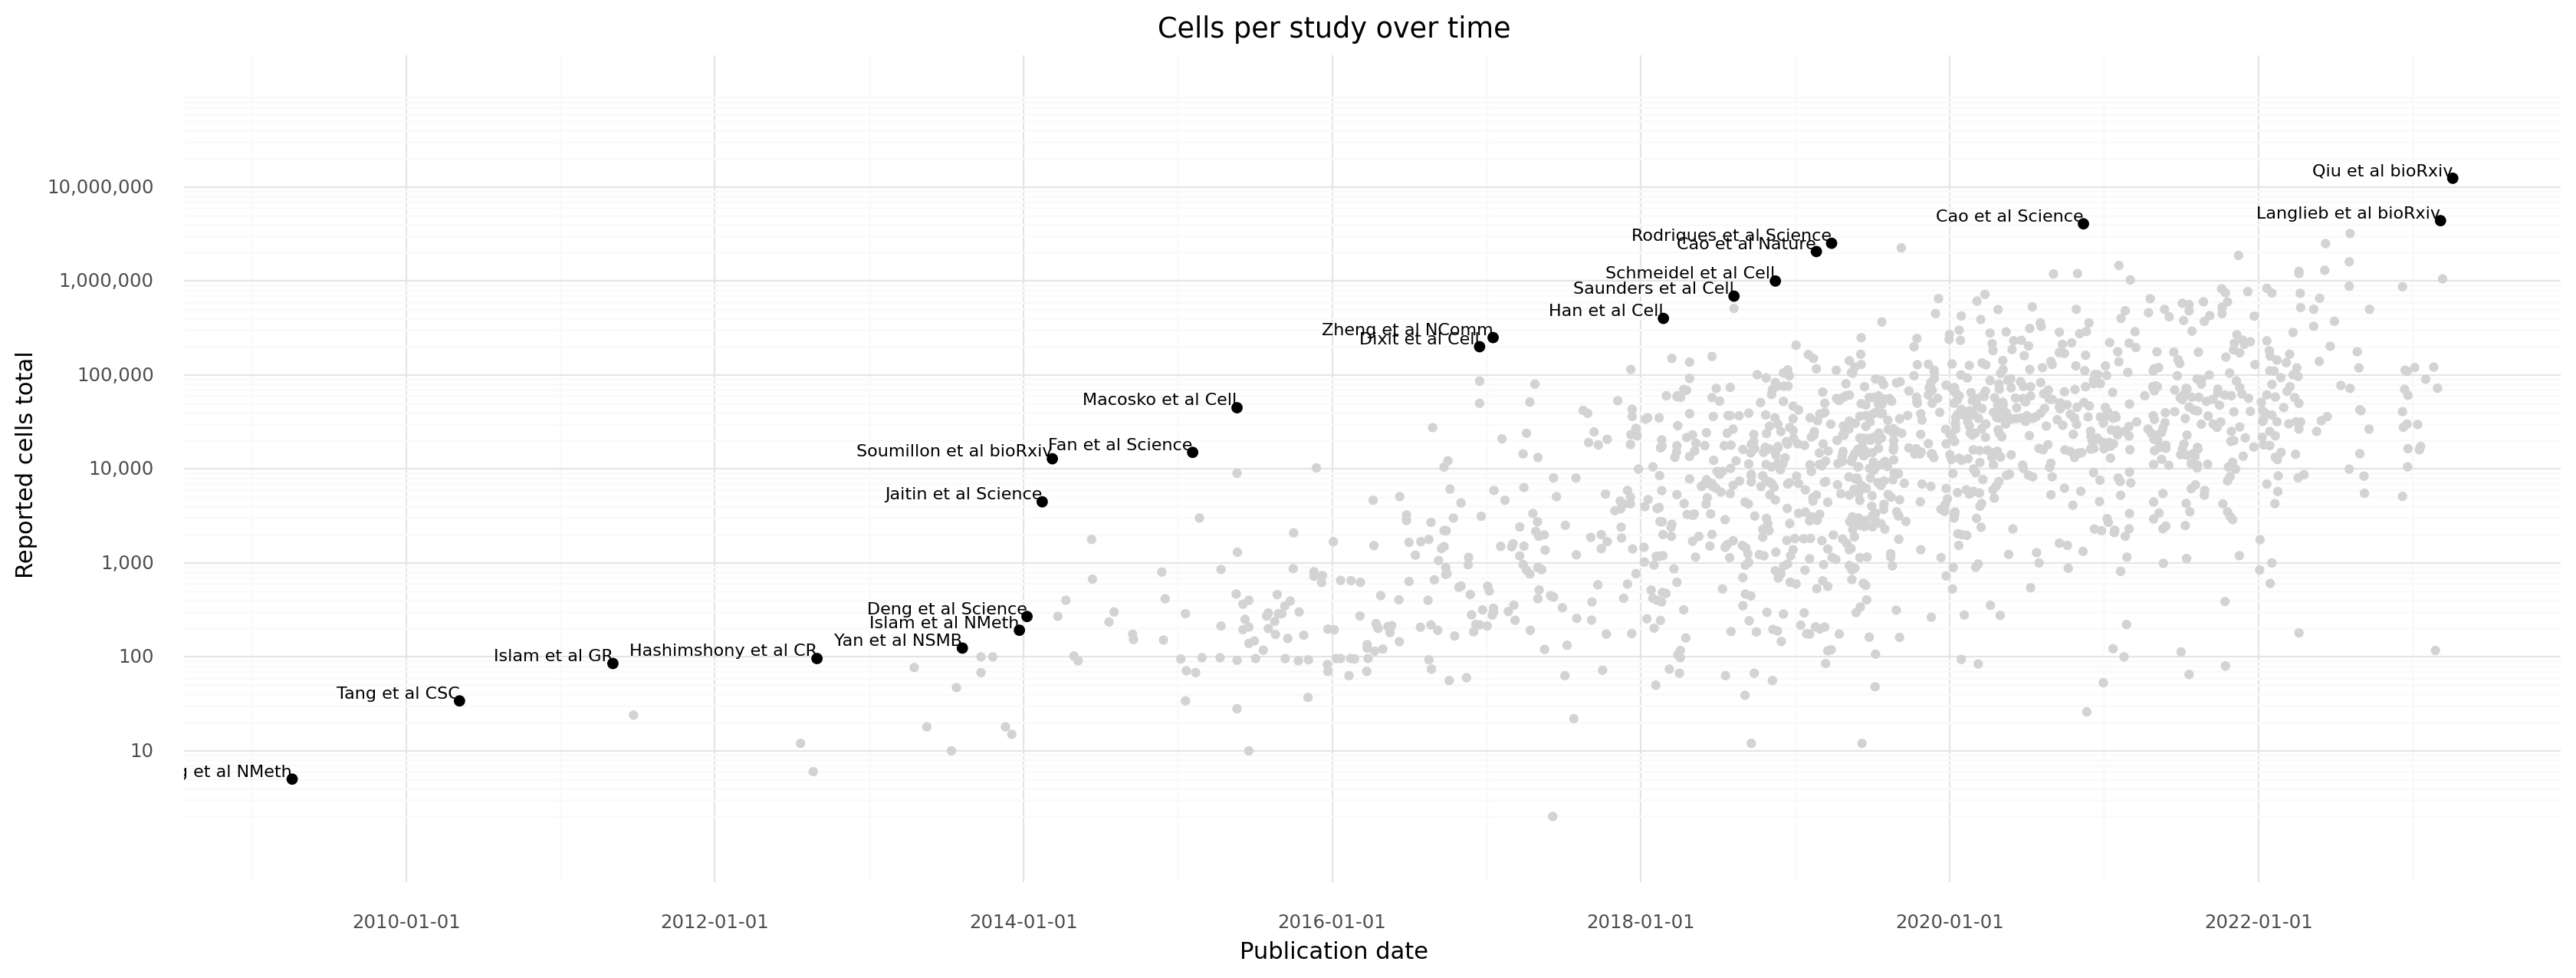

<ggplot: (8784882826195)>

In [10]:
p.options.figure_size = (20, 7)

fig =  (
    p.ggplot(p.aes(x = 'Date', y = 'Reported cells total'), df)
    + p.geom_point(color = 'lightgrey')
    + p.geom_point(size = 2, color = 'black', data = df.query('`Record breaker` == True'))
    + p.geom_text(
        p.aes(label = 'Shorthand'),
        data = df.query('`Record breaker` == True'),
        size = 8,
        ha = 'right',
        va = 'bottom'
    )
    + p.scale_y_log10(breaks = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], limits = (1, 1e8), labels = comma_format())
    + p.scale_x_datetime()
    + p.theme_minimal()
    + p.labs(title = 'Cells per study over time', x = 'Publication date')
)

fig

/usr/local/lib/python3.9/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 378 rows containing missing values.


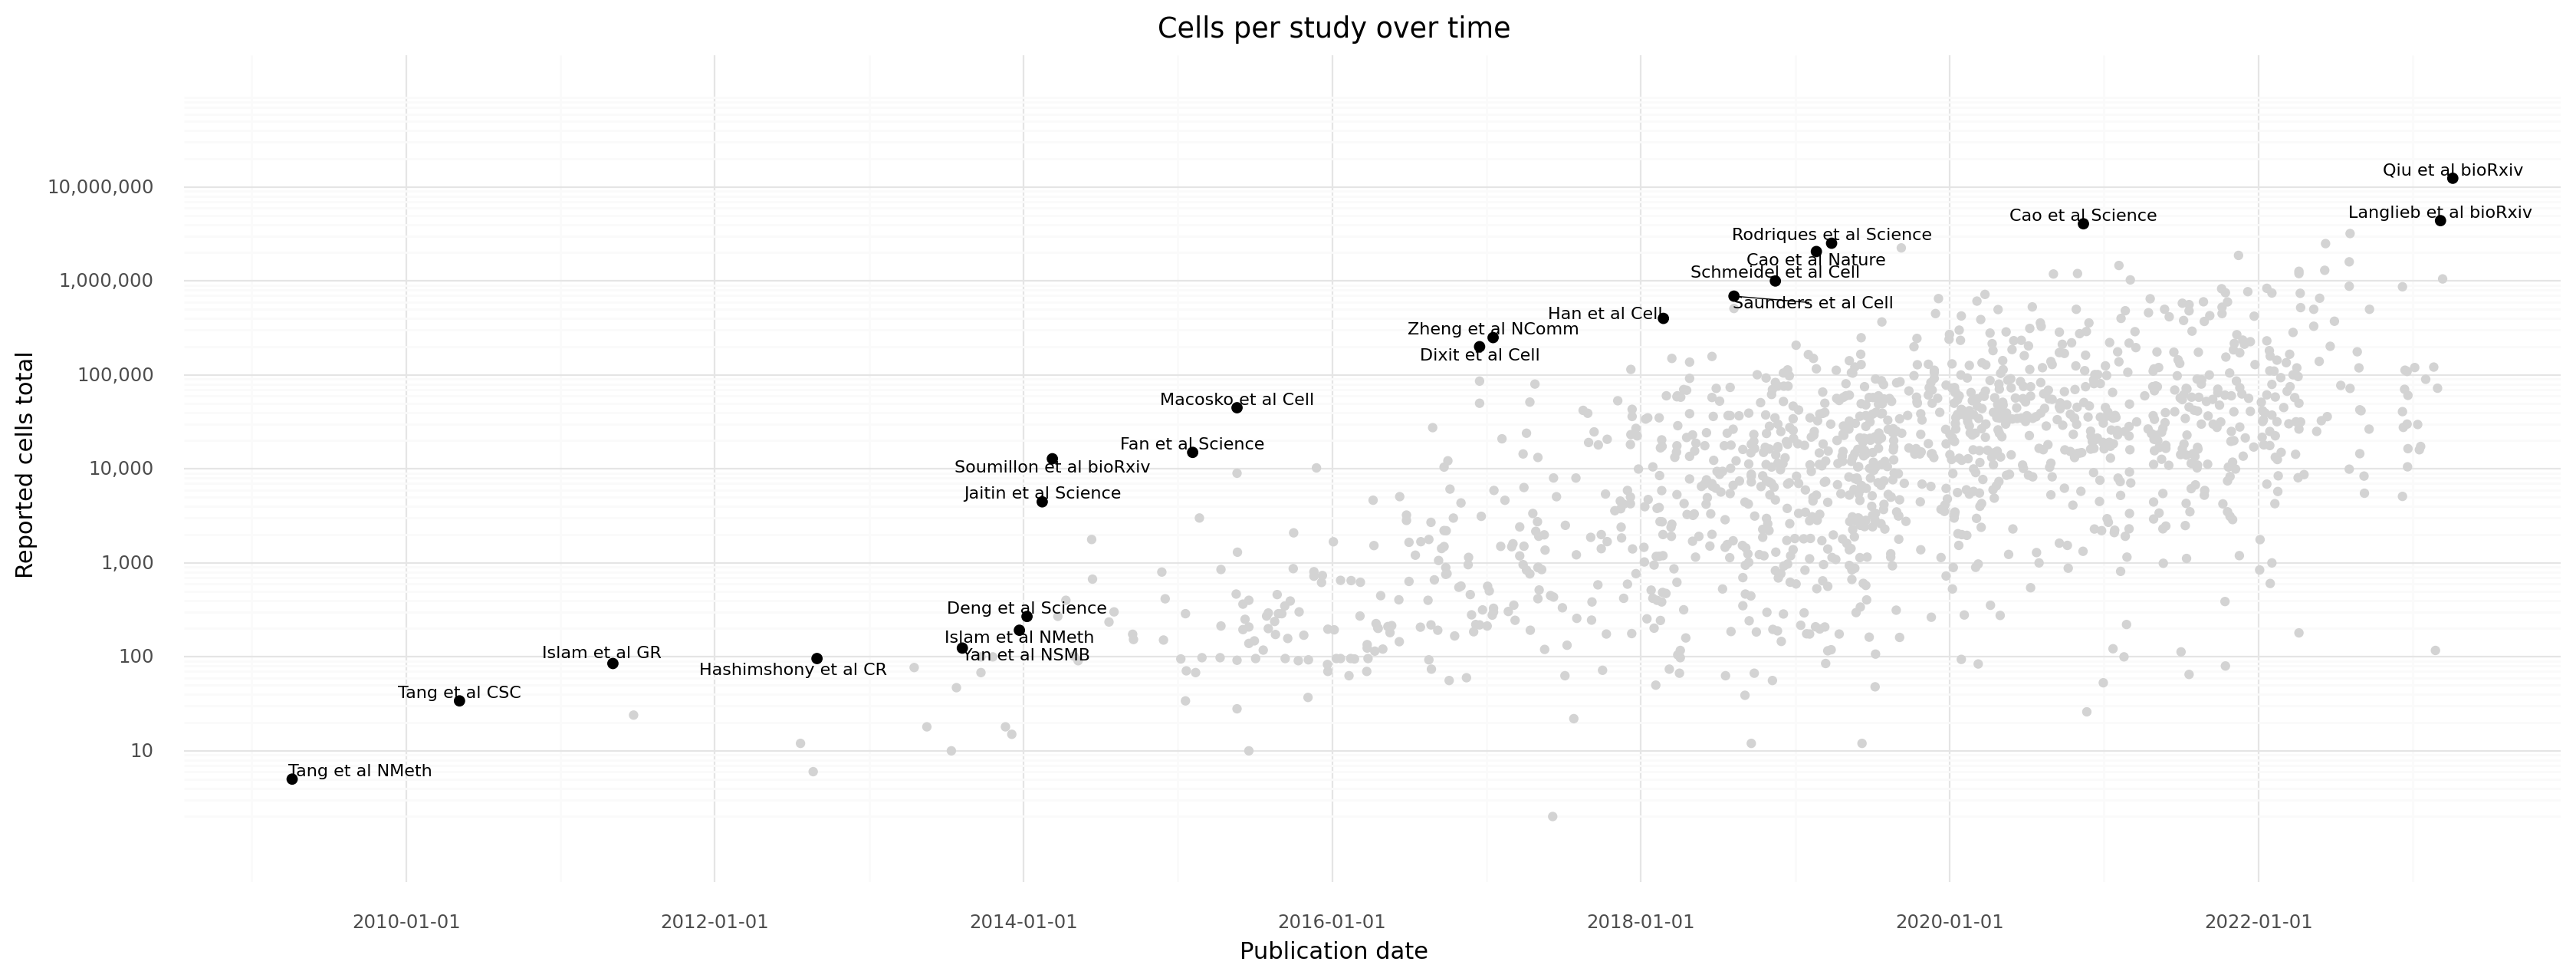

<ggplot: (8784949327818)>

In [11]:
p.options.figure_size = (20, 7)

fig =  (
    p.ggplot(p.aes(x = 'Date', y = 'Reported cells total'), df)
    + p.geom_point(color = 'lightgrey')
    + p.geom_point(size = 2, color = 'black', data = df.query('`Record breaker` == True'))
    + p.geom_text(
        p.aes(label = 'Shorthand'),
        data = df.query('`Record breaker` == True'),
        size = 8,
        adjust_text = {
            'expand_points': (1, 1.1),
            'expand_text': (1.5, 1.05),
            'arrowprops': {
                'arrowstyle': '-',
                'color': 'black',
                'lw': 0.5,
                'zorder': 0
            },
            'autoalign': 'y',
        }
    )
    + p.scale_y_log10(breaks = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7], limits = (1, 1e8), labels = comma_format())
    + p.scale_x_datetime()
    + p.theme_minimal()
    + p.labs(title = 'Cells per study over time', x = 'Publication date')
)

fig